## LEAD SCORING ASSIGNMENT

### Importing and Understanding Data

In [264]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [265]:
import pandas as pd
import numpy as np

In [266]:
# Importing Housing.csv
Leads = pd.read_csv('Leads.csv')
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [268]:
# Looking at the first five rows
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Preparation

In [269]:
Leads.apply(pd.isnull).mean()

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.155628
How did you hear about X Education               0.238853
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

##### We drop the records with null values in the variables 'Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity'

In [270]:
vars_to_drop_null = ['Lead Source','TotalVisits','Page Views Per Visit','Last Activity']

Leads = Leads.dropna(subset=vars_to_drop_null)

##### We use unknown values to replace null values in variables

In [271]:
Leads['What is your current occupation'] = Leads['What is your current occupation'].fillna('Null')
Leads['What matters most to you in choosing a course'] = Leads['What matters most to you in choosing a course'].fillna('Null')
Leads['Country'] = Leads['Country'].fillna('Null')
Leads['Specialization'] = Leads['Specialization'].fillna('Null')
Leads['How did you hear about X Education'] = Leads['How did you hear about X Education'].fillna('Null')
Leads['City'] = Leads['City'].fillna('Null')

##### We drop variables that have a high rate of nulls and variables that have no meaning to use

In [272]:
drop_var_list = ['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Prospect ID','Lead Number','Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Magazine']

get_dummies_vars =  ['What is your current occupation','What matters most to you in choosing a course','Country','Lead Origin','Lead Source','Last Activity','Specialization','How did you hear about X Education','City','Last Notable Activity']

binary_vars = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

We handle the categorical variables 'Country', 'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'How did you hear about X Education', 'City', 'Last Notable Activity' using `dummy variables`.

In [273]:
Leads['What is your current occupation'].value_counts()

Unemployed              5476
Null                    2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

=> We do not use this variable because of imbalance

In [274]:
Leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6370
Null                         2702
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

=> We do not use this variable because of imbalance

In [275]:
Leads['Country'].value_counts()

India                   6491
Null                    2296
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

=> We do not use this variable because of imbalance

In [276]:
Leads['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [277]:
lead_origin_dummies = pd.get_dummies(Leads['Lead Origin'], drop_first = True)
lead_origin_dummies.head()

,Landing Page Submission,Lead Add Form,Lead Import
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [278]:
Leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [279]:
Leads['Lead Source'] = ['Others' if x in ['Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'] else x for x in Leads['Lead Source']]
lead_source_dummies = pd.get_dummies(Leads['Lead Source'], drop_first = True, prefix='Lead_Source')
lead_source_dummies.head()

,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_google
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [280]:
Leads['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [281]:
Leads['Last Activity'] = ['Others' if x in ('Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails') else x for x in Leads['Last Activity']]
last_activity_dummies = pd.get_dummies(Leads['Last Activity'], drop_first = True, prefix='Last_Activity')
last_activity_dummies.head()

,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0


In [282]:
Leads['Specialization'].value_counts()

Select                               1851
Null                                 1431
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [283]:
specialization_dummies = pd.get_dummies(Leads['Specialization'], drop_first = True, prefix='Specialization')
specialization_dummies.head()

,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Null,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [284]:
Leads['City'].value_counts()

Mumbai                         3177
Select                         2156
Null                           1419
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [285]:
city_dummies = pd.get_dummies(Leads['City'], drop_first = True, prefix='City')
city_dummies.head()

,City_Null,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [286]:
Leads['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [287]:
Leads['Last Notable Activity'] = ['Others' if x in ('Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received') else x for x in Leads['Last Notable Activity']]
last_notable_activity_dummies = pd.get_dummies(Leads['Last Notable Activity'], drop_first = True, prefix='Last_Notable_Activity')
last_notable_activity_dummies.head()

,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Others,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed
0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0


In [288]:
# Add the results to the original Leads dataframe
    Leads = pd.concat([Leads,lead_origin_dummies,lead_source_dummies,last_activity_dummies,last_notable_activity_dummies,specialization_dummies,city_dummies], axis = 1)
# Drop variables as we have created the dummies for them
Leads = Leads.drop(get_dummies_vars,axis = 1)
# Drop the variables in drop_var_list
Leads = Leads.drop(drop_var_list,axis = 1)
# Now let's see the head of our dataframe.
Leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Null,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities
0,No,No,0,0.0,0,0.0,No,No,No,No,...,0,0,0,0,0,0,0,1,0,0
1,No,No,0,5.0,674,2.5,No,No,No,No,...,0,0,0,0,0,0,0,1,0,0
2,No,No,1,2.0,1532,2.0,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0
3,No,No,0,1.0,305,1.0,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0
4,No,No,1,2.0,1428,1.0,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0


##### Convert binary variable value to 0, 1

In [289]:
Leads[binary_vars].head

<bound method NDFrame.head of      Do Not Email Do Not Call Search Newspaper Article X Education Forums  \
0              No          No     No                No                 No   
1              No          No     No                No                 No   
2              No          No     No                No                 No   
3              No          No     No                No                 No   
4              No          No     No                No                 No   
...           ...         ...    ...               ...                ...   
9235          Yes          No     No                No                 No   
9236           No          No     No                No                 No   
9237          Yes          No     No                No                 No   
9238           No          No     No                No                 No   
9239           No          No     No                No                 No   

     Newspaper Digital Advertisement Through 

In [290]:
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Leads[binary_vars] = Leads[binary_vars].apply(binary_map)

In [291]:
Leads[binary_vars].head

<bound method NDFrame.head of       Do Not Email  Do Not Call  Search  Newspaper Article  \
0                0            0       0                  0   
1                0            0       0                  0   
2                0            0       0                  0   
3                0            0       0                  0   
4                0            0       0                  0   
...            ...          ...     ...                ...   
9235             1            0       0                  0   
9236             0            0       0                  0   
9237             1            0       0                  0   
9238             0            0       0                  0   
9239             0            0       0                  0   

      X Education Forums  Newspaper  Digital Advertisement  \
0                      0          0                      0   
1                      0          0                      0   
2                      0          0    

## Splitting the Data into Training and Testing Sets

In [292]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(Leads, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [293]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [294]:
# Apply scaler() to all the columns in num_vars
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Null,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities
3009,0,0,0,0.007968,0.178347,0.083333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,0,0.007968,0.085355,0.083333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4750,0,0,1,0.007968,0.619946,0.083333,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7987,0,0,1,0.019920,0.711590,0.104167,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Looking at Correlations

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



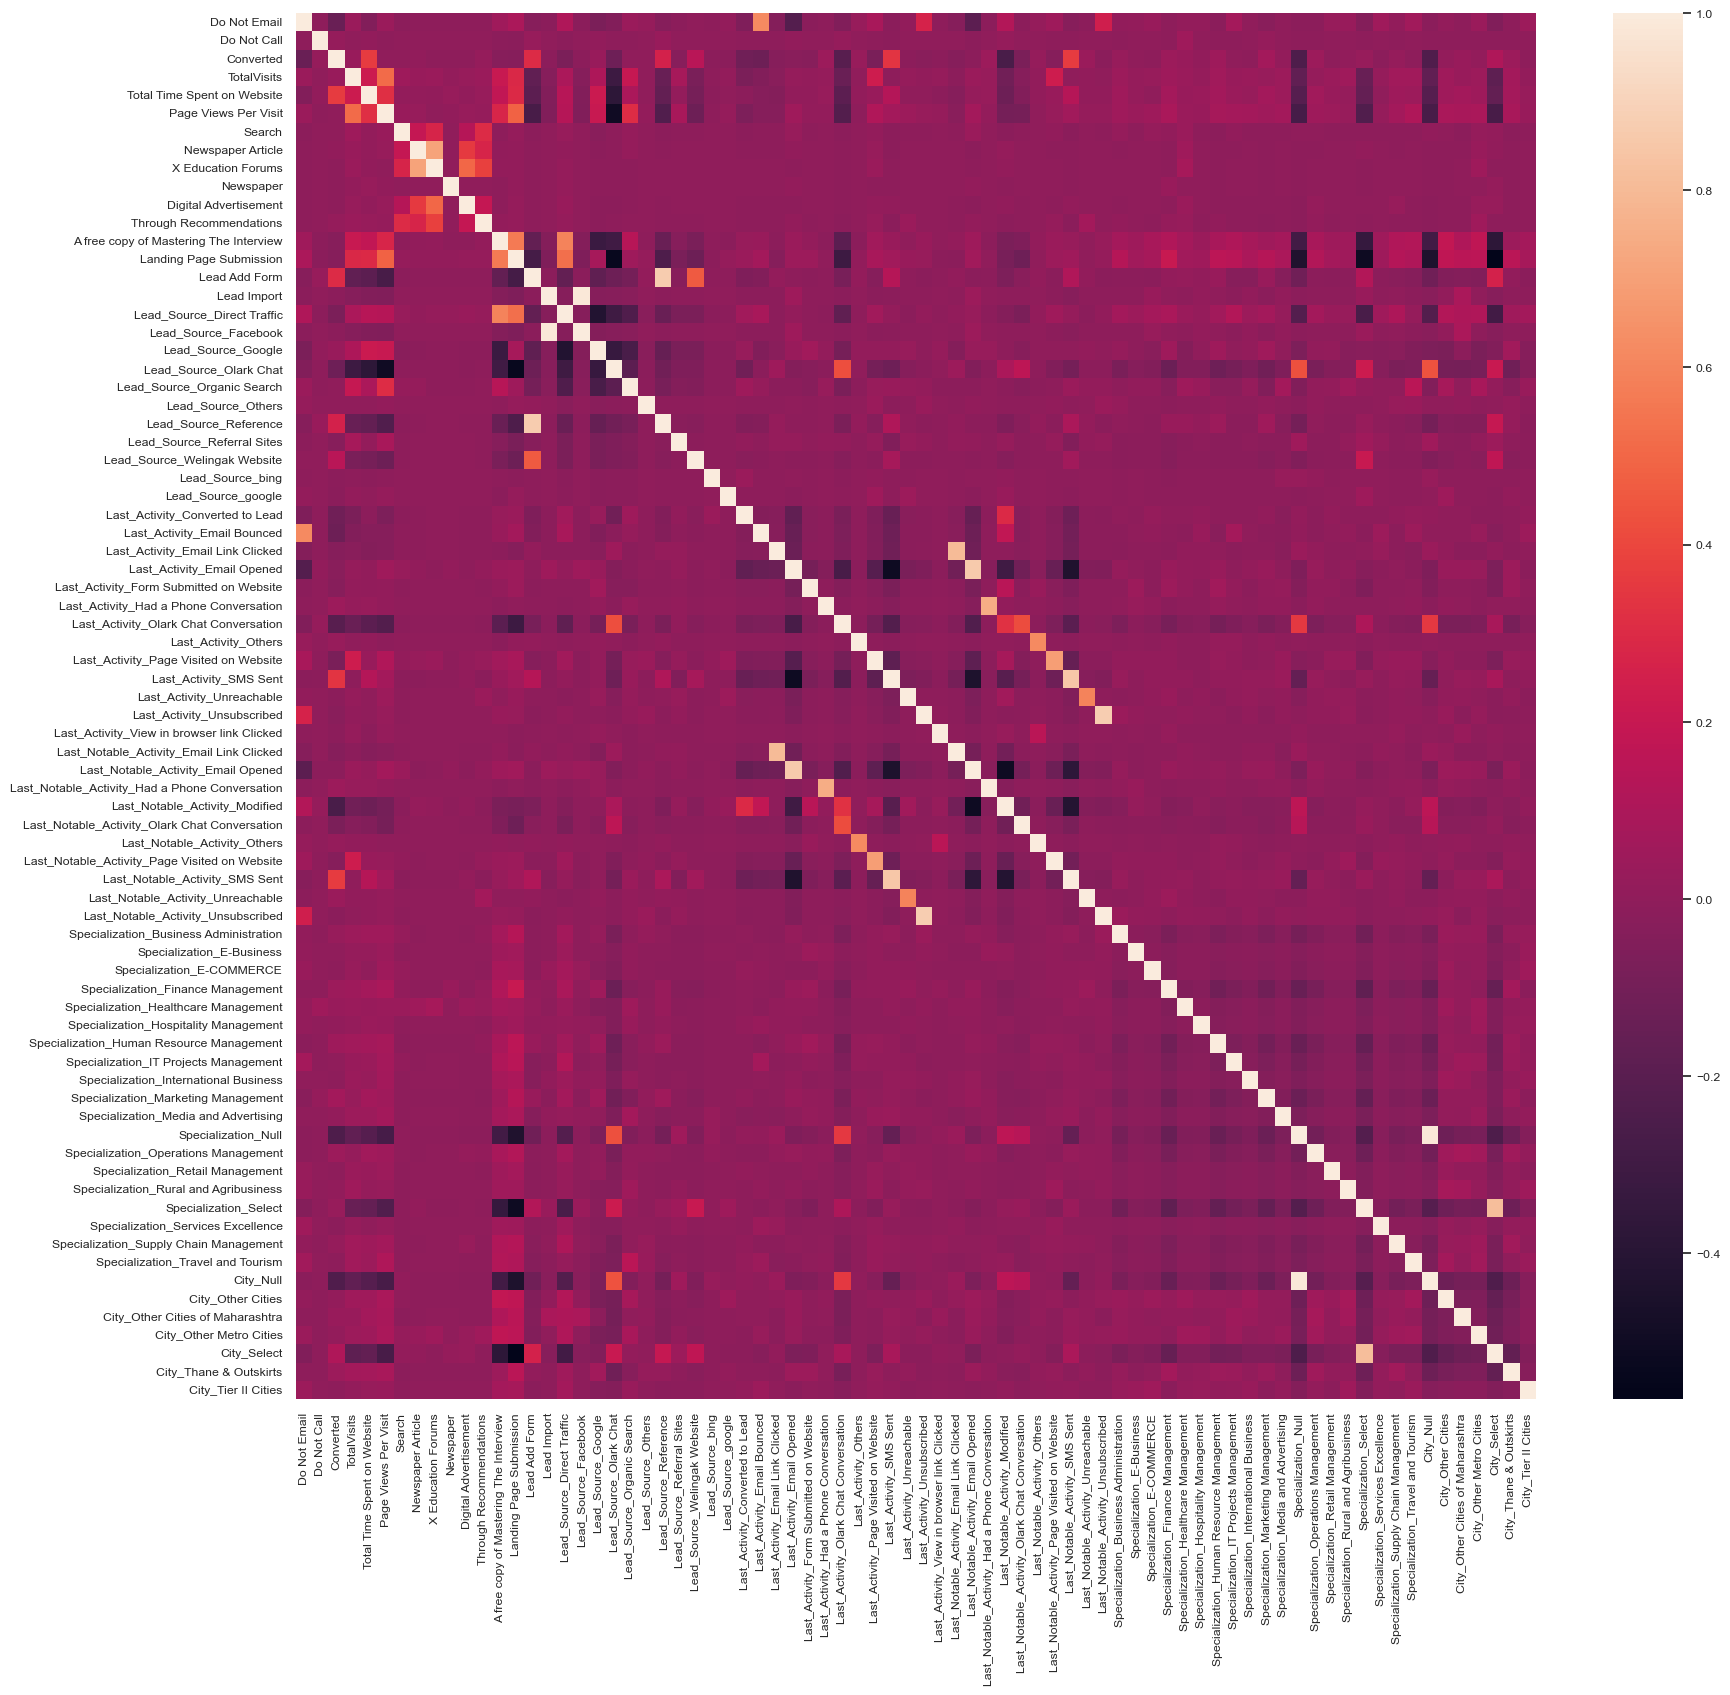

In [296]:
plt.figure(figsize=(20, 18)) 
sns.set(font_scale=0.8)  
sns.heatmap(Leads.corr(), annot=False)
plt.show()

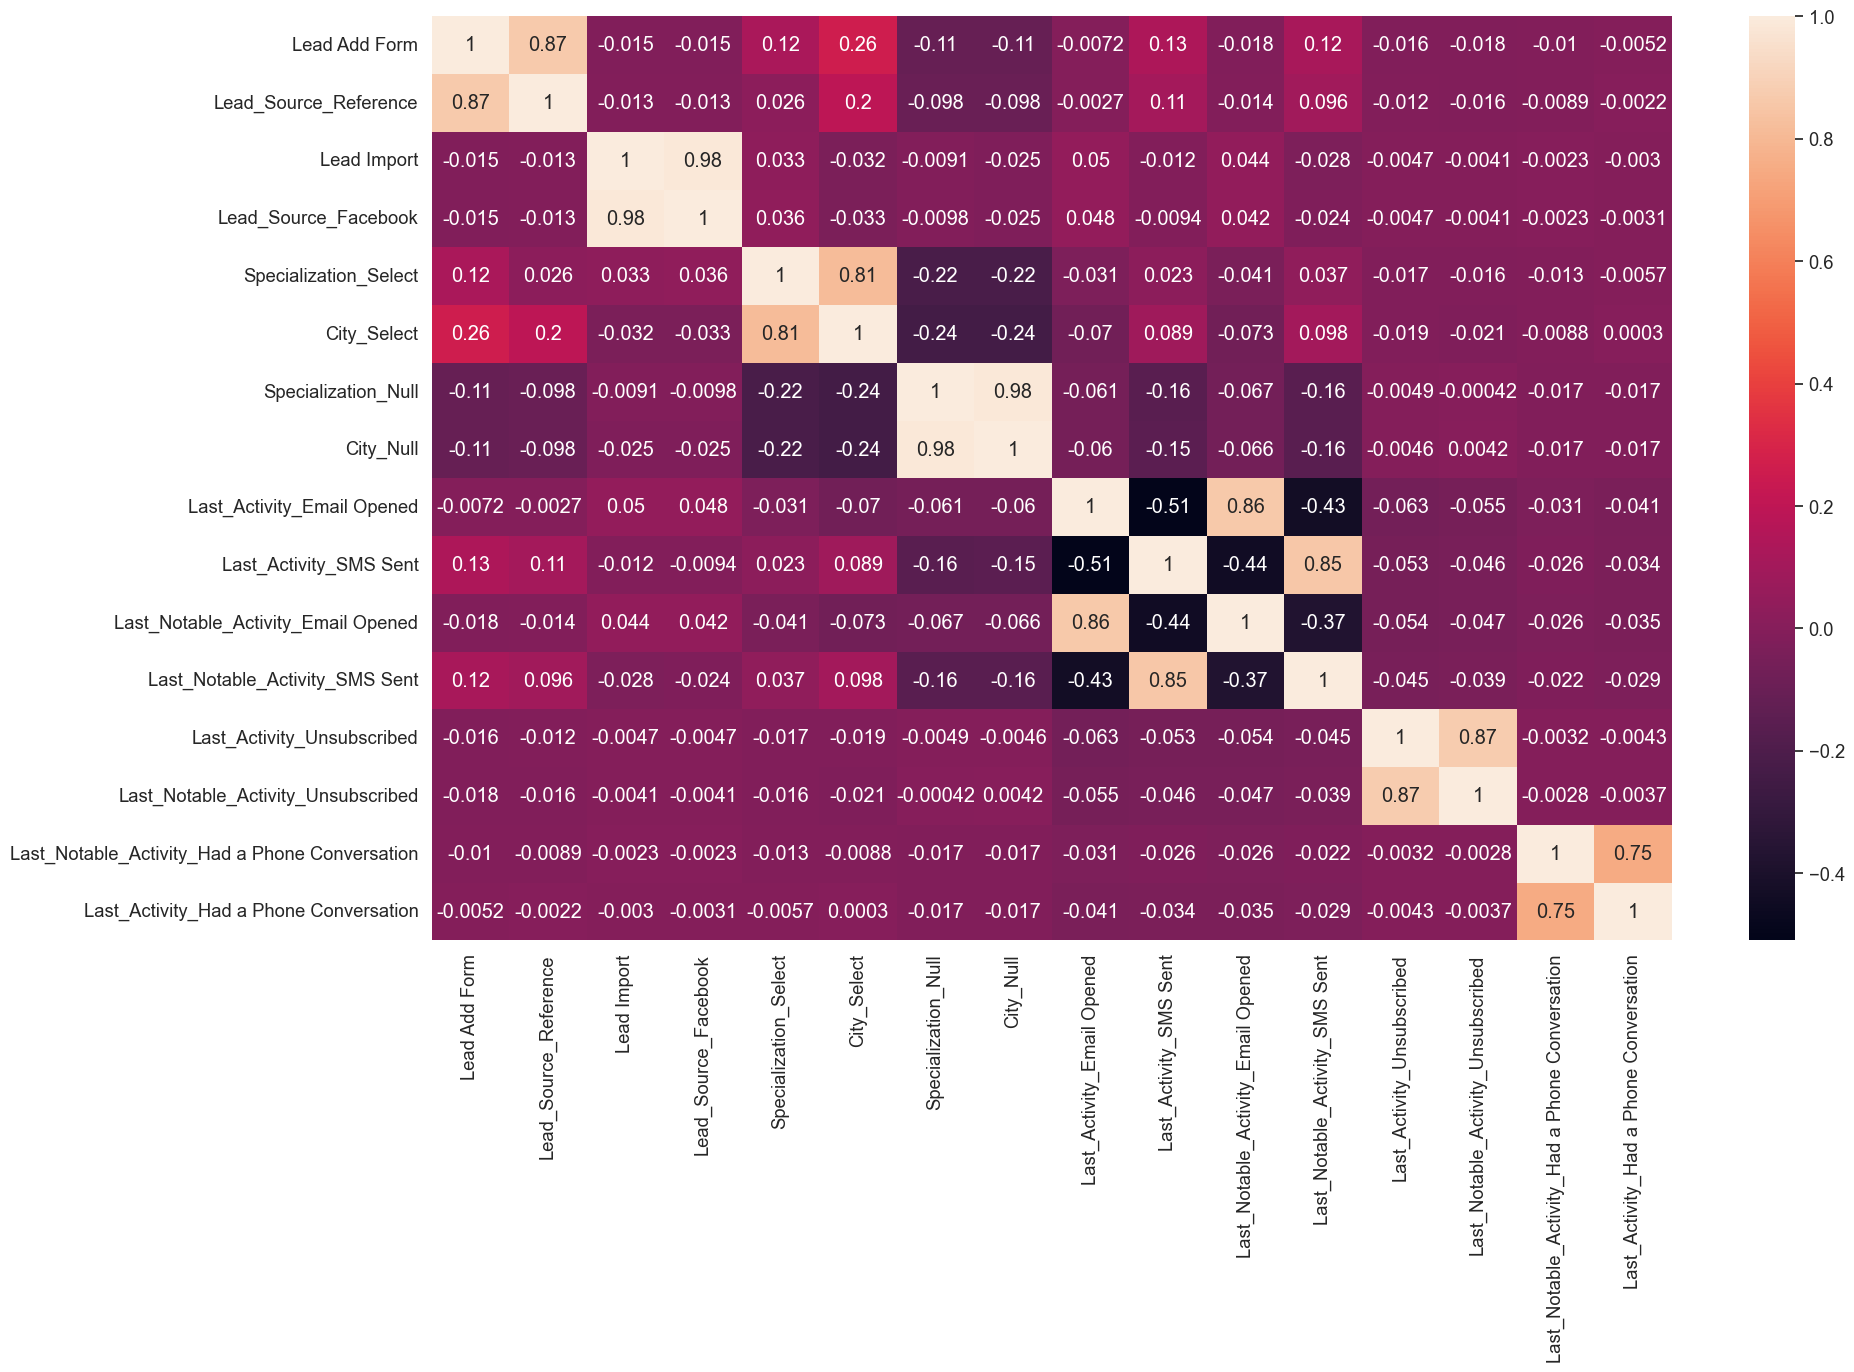

In [297]:
plt.figure(figsize=(20, 12)) 
sns.set(font_scale=1.2) 
sns.heatmap(Leads[['Lead Add Form','Lead_Source_Reference','Lead Import','Lead_Source_Facebook','Specialization_Select','City_Select','Specialization_Null','City_Null','Last_Activity_Email Opened','Last_Activity_SMS Sent','Last_Notable_Activity_Email Opened','Last_Notable_Activity_SMS Sent','Last_Activity_Unsubscribed','Last_Notable_Activity_Unsubscribed','Last_Notable_Activity_Had a Phone Conversation','Last_Activity_Had a Phone Conversation']].corr(), annot=True)
plt.show()

#### Dropping highly correlated dummy variables

In [298]:
df_test = df_test.drop(['Lead Add Form','Lead Import','Specialization_Null','Specialization_Select','Last_Activity_Email Opened','Last_Activity_SMS Sent','Last_Activity_Unsubscribed'], 1)
df_train = df_train.drop(['Lead Add Form','Lead Import','Specialization_Null','Specialization_Select','Last_Activity_Email Opened','Last_Activity_SMS Sent','Last_Activity_Unsubscribed'], 1)

After dropping highly correlated variables now let's check the correlation matrix again.

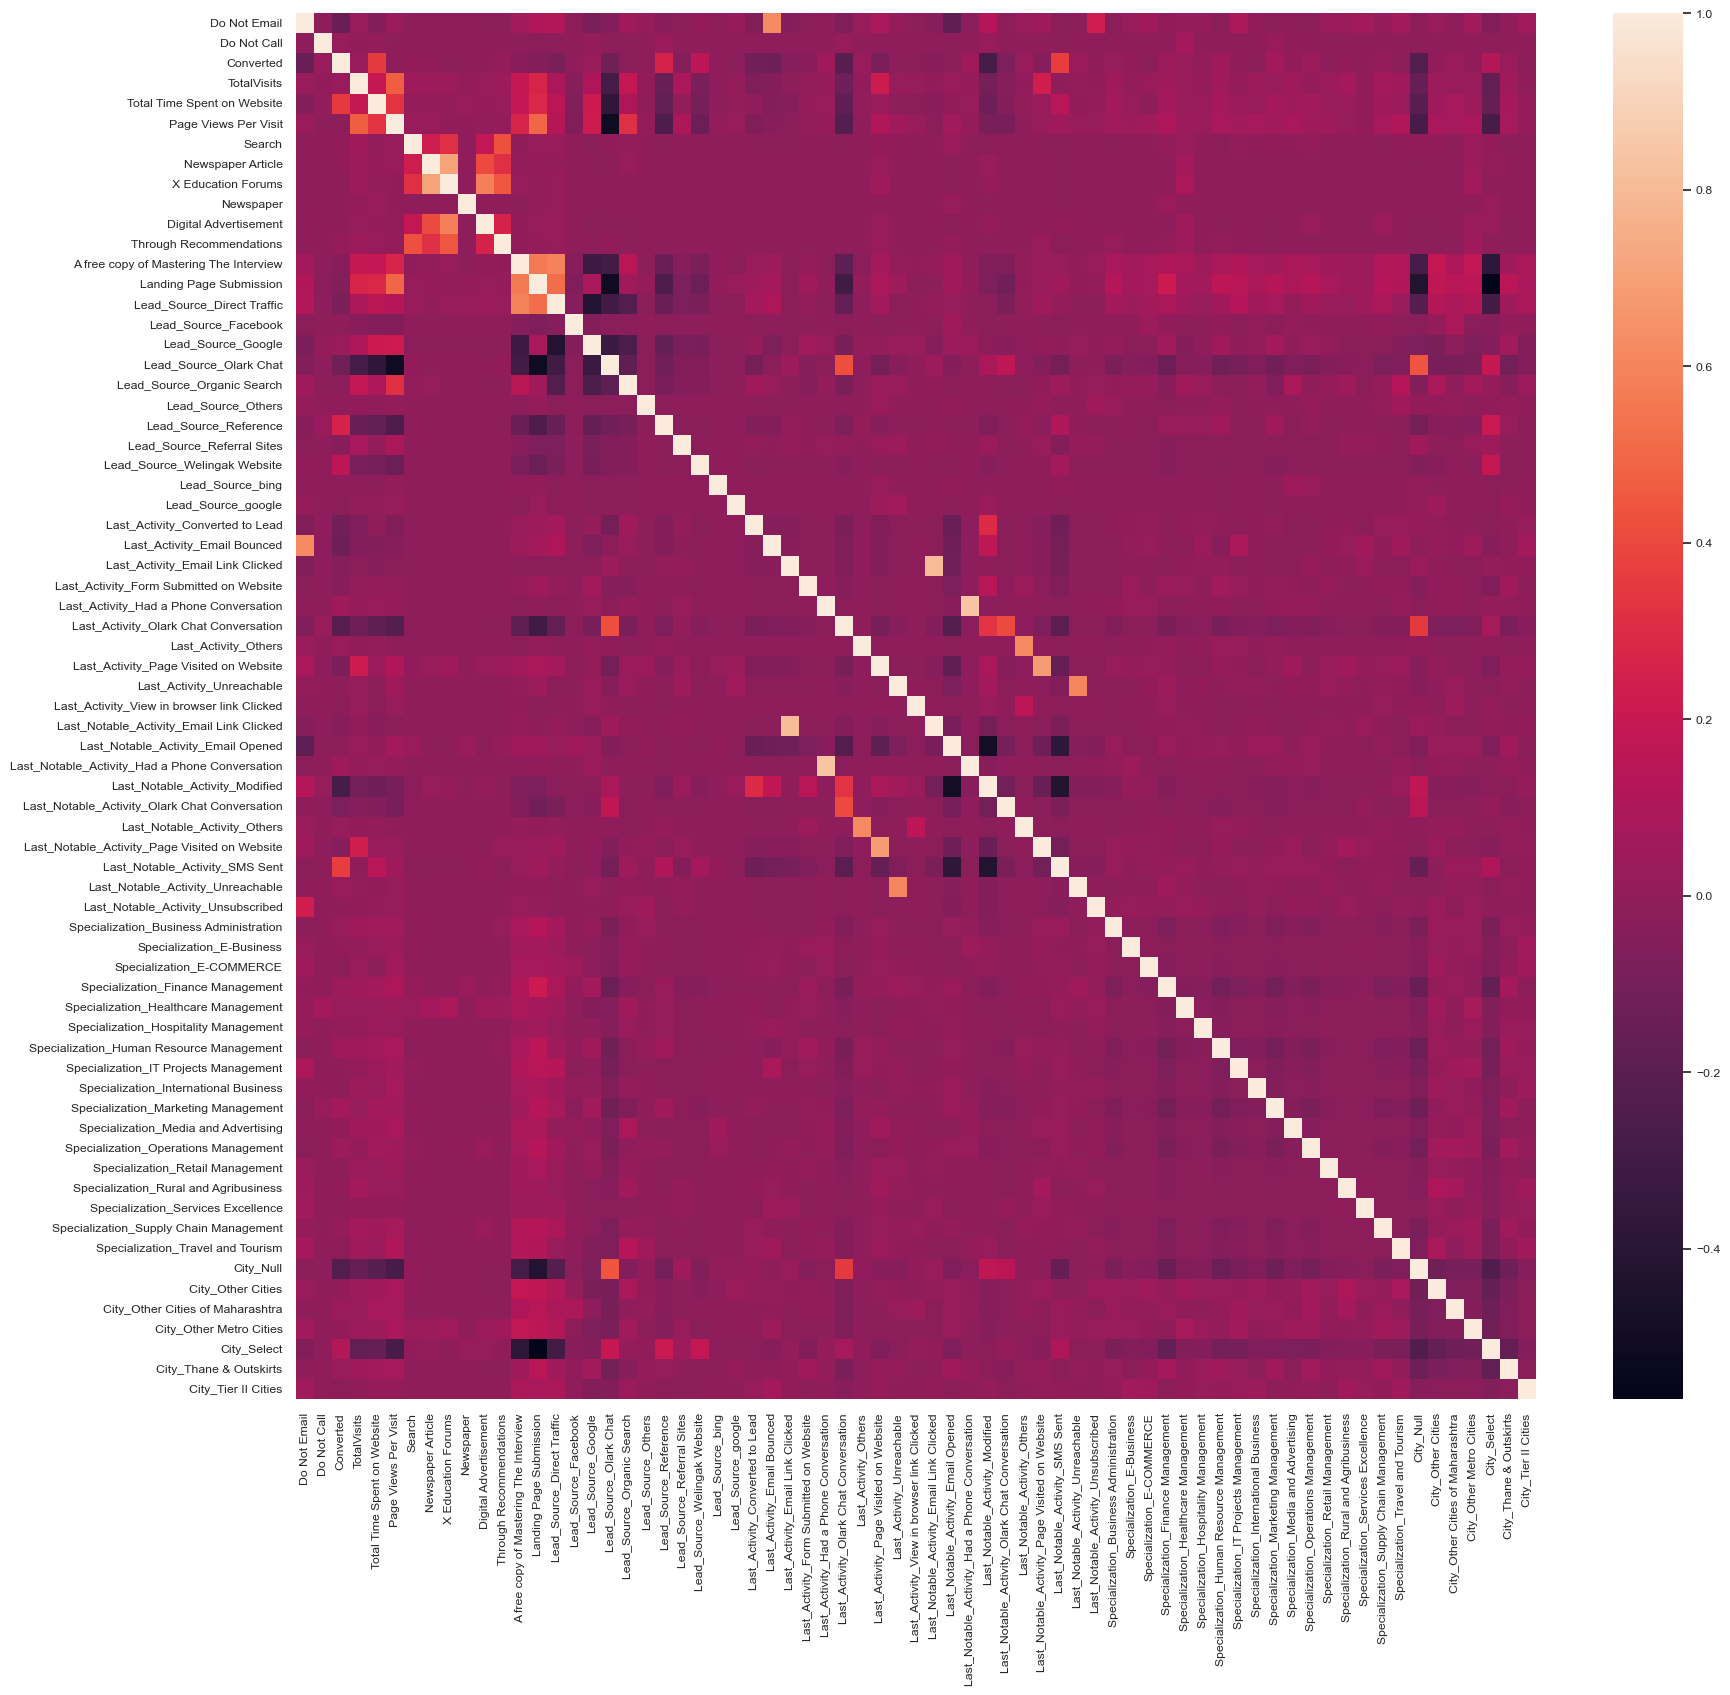

In [299]:
plt.figure(figsize=(20, 18)) 
sns.set(font_scale=0.8)  
sns.heatmap(df_train.corr(), annot=False)
plt.show()

### Dividing into X and Y sets for the model building

In [300]:
y_train = df_train.pop('Converted')
X_train = df_train

## Building the model


### RFE

In [301]:
# Importing RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [302]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [303]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 29),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 44),
 ('Newspaper Article', False, 18),
 ('X Education Forums', False, 19),
 ('Newspaper', False, 12),
 ('Digital Advertisement', False, 41),
 ('Through Recommendations', False, 15),
 ('A free copy of Mastering The Interview', False, 37),
 ('Landing Page Submission', False, 4),
 ('Lead_Source_Direct Traffic', True, 1),
 ('Lead_Source_Facebook', False, 7),
 ('Lead_Source_Google', True, 1),
 ('Lead_Source_Olark Chat', False, 47),
 ('Lead_Source_Organic Search', True, 1),
 ('Lead_Source_Others', False, 34),
 ('Lead_Source_Reference', True, 1),
 ('Lead_Source_Referral Sites', True, 1),
 ('Lead_Source_Welingak Website', True, 1),
 ('Lead_Source_bing', False, 40),
 ('Lead_Source_google', True, 1),
 ('Last_Activity_Converted to Lead', False, 2),
 ('Last_Activity_Email Bounced', True, 1),
 ('Last_Activity_Email Lin

In [304]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead_Source_Direct Traffic',
       'Lead_Source_Google', 'Lead_Source_Organic Search',
       'Lead_Source_Reference', 'Lead_Source_Referral Sites',
       'Lead_Source_Welingak Website', 'Lead_Source_google',
       'Last_Activity_Email Bounced', 'Last_Activity_Had a Phone Conversation',
       'Last_Activity_Olark Chat Conversation',
       'Last_Notable_Activity_Email Link Clicked',
       'Last_Notable_Activity_Email Opened', 'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark Chat Conversation',
       'Last_Notable_Activity_Page Visited on Website', 'City_Null'],
      dtype='object')

In [305]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Landing Page Submission',
       'Lead_Source_Facebook', 'Lead_Source_Olark Chat', 'Lead_Source_Others',
       'Lead_Source_bing', 'Last_Activity_Converted to Lead',
       'Last_Activity_Email Link Clicked',
       'Last_Activity_Form Submitted on Website', 'Last_Activity_Others',
       'Last_Activity_Page Visited on Website', 'Last_Activity_Unreachable',
       'Last_Activity_View in browser link Clicked',
       'Last_Notable_Activity_Had a Phone Conversation',
       'Last_Notable_Activity_Others', 'Last_Notable_Activity_SMS Sent',
       'Last_Notable_Activity_Unreachable',
       'Last_Notable_Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specializat

### Building model using statsmodel, for the detailed statistics

In [306]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2720.8
Date:                Fri, 25 Aug 2023   Deviance:                       5441.6
Time:                        00:12:35   Pearson chi2:                 6.55e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3789
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.9387      0.106      8.879      0.000       0.731       1.146
Do Not Email                                     -1.5655      0.194     -8.049      0.000      -1.947      -1.184
TotalVisits                                       8.9897      2.485      3.617      0.000       4.119      13.861
Total Time Spent on Website                       4.6418      0.162     28.659      0.000       4.324       4.959
Page Views Per Visit                             -1.5386      0.556     -2.768      0.006      -2.628      -0.449
Lead_Source_Direct Traffic                       -1.7597      0.131    -13.469      0.000      -2.016      -1.504
Lead_Source_Google                               -1.2855      0.127    -10.145      0.000      -1.534      -1.037
Lead_Source_Organic Search                       -1.4682      0.157     -9.379      0.000      -1.775      -1.161
Lead_Source_Reference                             2.6938      0.232     11.611      0.000       2.239       3.149
Lead_Source_Referral Sites                       -1.4312      0.340     -4.207      0.000      -2.098      -0.764
Lead_Source_Welingak Website                      4.2616      0.731      5.832      0.000       2.830       5.694
Lead_Source_google                              -21.5775   1.29e+04     -0.002      0.999   -2.52e+04    2.52e+04
Last_Activity_Email Bounced                      -1.2685      0.420     -3.021      0.003      -2.091      -0.445
Last_Activity_Had a Phone Conversation            1.6609      0.779      2.132      0.033       0.134       3.187
Last_Activity_Olark Chat Conversation            -1.0992      0.189     -5.818      0.000      -1.470      -0.729
Last_Notable_Activity_Email Link Clicked         -1.7798      0.253     -7.027      0.000      -2.276      -1.283
Last_Notable_Activity_Email Opened               -1.3927      0.086    -16.102      0.000      -1.562      -1.223
Last_Notable_Activity_Modified                   -1.8606      0.095    -19.518      0.000      -2.047      -1.674
Last_Notable_Activity_Olark Chat Conversation    -1.6498      0.376     -4.389      0.000      -2.387      -0.913
Last_Notable_Activity_Page Visited on Website    -1.8663      0.207     -9.022      0.000      -2.272      -1.461
City_Null                                        -1.3157      0.127    -10.337      0.000      -1.565      -1.066
=================================================================================================================
"""

In [307]:
col = col.drop('Lead_Source_google', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead_Source_Direct Traffic',
       'Lead_Source_Google', 'Lead_Source_Organic Search',
       'Lead_Source_Reference', 'Lead_Source_Referral Sites',
       'Lead_Source_Welingak Website', 'Last_Activity_Email Bounced',
       'Last_Activity_Had a Phone Conversation',
       'Last_Activity_Olark Chat Conversation',
       'Last_Notable_Activity_Email Link Clicked',
       'Last_Notable_Activity_Email Opened', 'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark Chat Conversation',
       'Last_Notable_Activity_Page Visited on Website', 'City_Null'],
      dtype='object')

In [308]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2723.5
Date:                Fri, 25 Aug 2023   Deviance:                       5446.9
Time:                        00:12:35   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3784
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.9297      0.106      8.804      0.000       0.723       1.137
Do Not Email                                     -1.5659      0.194     -8.063      0.000      -1.947      -1.185
TotalVisits                                       8.8854      2.473      3.593      0.000       4.039      13.732
Total Time Spent on Website                       4.6292      0.162     28.632      0.000       4.312       4.946
Page Views Per Visit                             -1.5951      0.555     -2.874      0.004      -2.683      -0.507
Lead_Source_Direct Traffic                       -1.7366      0.130    -13.350      0.000      -1.992      -1.482
Lead_Source_Google                               -1.2617      0.126    -10.005      0.000      -1.509      -1.015
Lead_Source_Organic Search                       -1.4415      0.156     -9.247      0.000      -1.747      -1.136
Lead_Source_Reference                             2.7059      0.232     11.664      0.000       2.251       3.161
Lead_Source_Referral Sites                       -1.4037      0.340     -4.133      0.000      -2.069      -0.738
Lead_Source_Welingak Website                      4.2736      0.731      5.848      0.000       2.841       5.706
Last_Activity_Email Bounced                      -1.2651      0.420     -3.013      0.003      -2.088      -0.442
Last_Activity_Had a Phone Conversation            1.6616      0.779      2.133      0.033       0.135       3.188
Last_Activity_Olark Chat Conversation            -1.0854      0.189     -5.748      0.000      -1.456      -0.715
Last_Notable_Activity_Email Link Clicked         -1.7775      0.253     -7.018      0.000      -2.274      -1.281
Last_Notable_Activity_Email Opened               -1.3918      0.086    -16.101      0.000      -1.561      -1.222
Last_Notable_Activity_Modified                   -1.8690      0.095    -19.619      0.000      -2.056      -1.682
Last_Notable_Activity_Olark Chat Conversation    -1.6568      0.376     -4.409      0.000      -2.393      -0.920
Last_Notable_Activity_Page Visited on Website    -1.8640      0.207     -9.019      0.000      -2.269      -1.459
City_Null                                        -1.3169      0.127    -10.350      0.000      -1.566      -1.068
=================================================================================================================
"""

In [309]:
col = col.drop('Last_Activity_Had a Phone Conversation', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead_Source_Direct Traffic',
       'Lead_Source_Google', 'Lead_Source_Organic Search',
       'Lead_Source_Reference', 'Lead_Source_Referral Sites',
       'Lead_Source_Welingak Website', 'Last_Activity_Email Bounced',
       'Last_Activity_Olark Chat Conversation',
       'Last_Notable_Activity_Email Link Clicked',
       'Last_Notable_Activity_Email Opened', 'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark Chat Conversation',
       'Last_Notable_Activity_Page Visited on Website', 'City_Null'],
      dtype='object')

In [310]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2726.3
Date:                Fri, 25 Aug 2023   Deviance:                       5452.6
Time:                        00:12:49   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3778
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.9374      0.106      8.876      0.000       0.730       1.144
Do Not Email                                     -1.5709      0.194     -8.079      0.000      -1.952      -1.190
TotalVisits                                       8.9850      2.479      3.624      0.000       4.125      13.845
Total Time Spent on Website                       4.6250      0.161     28.638      0.000       4.309       4.942
Page Views Per Visit                             -1.6100      0.555     -2.902      0.004      -2.697      -0.522
Lead_Source_Direct Traffic                       -1.7354      0.130    -13.343      0.000      -1.990      -1.480
Lead_Source_Google                               -1.2557      0.126     -9.963      0.000      -1.503      -1.009
Lead_Source_Organic Search                       -1.4324      0.156     -9.195      0.000      -1.738      -1.127
Lead_Source_Reference                             2.7040      0.232     11.655      0.000       2.249       3.159
Lead_Source_Referral Sites                       -1.3825      0.337     -4.108      0.000      -2.042      -0.723
Lead_Source_Welingak Website                      4.2724      0.731      5.846      0.000       2.840       5.705
Last_Activity_Email Bounced                      -1.2687      0.420     -3.021      0.003      -2.092      -0.446
Last_Activity_Olark Chat Conversation            -1.0904      0.189     -5.775      0.000      -1.460      -0.720
Last_Notable_Activity_Email Link Clicked         -1.7867      0.253     -7.055      0.000      -2.283      -1.290
Last_Notable_Activity_Email Opened               -1.4017      0.086    -16.233      0.000      -1.571      -1.232
Last_Notable_Activity_Modified                   -1.8725      0.095    -19.675      0.000      -2.059      -1.686
Last_Notable_Activity_Olark Chat Conversation    -1.6597      0.376     -4.417      0.000      -2.396      -0.923
Last_Notable_Activity_Page Visited on Website    -1.8764      0.207     -9.081      0.000      -2.281      -1.471
City_Null                                        -1.3210      0.127    -10.380      0.000      -1.570      -1.072
=================================================================================================================
"""

### Checking and dealing with multicollinearity

In [311]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,4.56
5,Lead_Source_Google,3.39
4,Lead_Source_Direct Traffic,3.00
14,Last_Notable_Activity_Modified,2.43
6,Lead_Source_Organic Search,2.32
2,Total Time Spent on Website,2.29
1,TotalVisits,2.01
0,Do Not Email,1.85
11,Last_Activity_Olark Chat Conversation,1.84
13,Last_Notable_Activity_Email Opened,1.77


All variables have a good value of VIF. So no need to drop any variables and we can proceed with making predictions using this model only

In [312]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.191932
1012    0.035387
9226    0.281888
4750    0.881493
7987    0.652916
1281    0.850076
2880    0.141170
4971    0.932453
7536    0.852399
1248    0.593214
dtype: float64

In [313]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
3009,0,0.191932,3009
1012,0,0.035387,1012
9226,0,0.281888,9226
4750,1,0.881493,4750
7987,1,0.652916,7987


### Plotting the ROC Curve

In [314]:
from sklearn import metrics

In [315]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [316]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

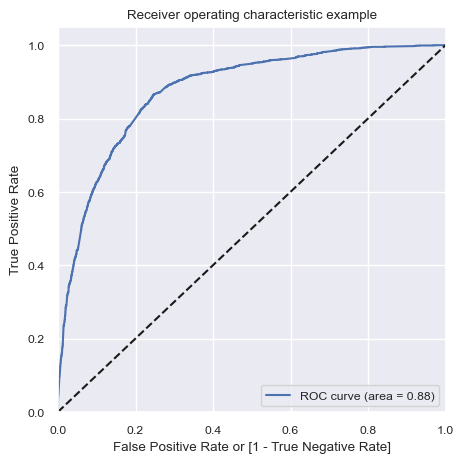

In [317]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Finding Optimal Cutoff Point

In [318]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.191932,3009,1,1,0,0,0,0,0,0,0,0
1012,0,0.035387,1012,1,0,0,0,0,0,0,0,0,0
9226,0,0.281888,9226,1,1,1,0,0,0,0,0,0,0
4750,1,0.881493,4750,1,1,1,1,1,1,1,1,1,0
7987,1,0.652916,7987,1,1,1,1,1,1,1,0,0,0


In [319]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.576917  0.978332  0.325480
0.2   0.2  0.756574  0.917825  0.655570
0.3   0.3  0.795465  0.867130  0.750576
0.4   0.4  0.802866  0.772281  0.822023
0.5   0.5  0.800346  0.683565  0.873496
0.6   0.6  0.790742  0.597711  0.911652
0.7   0.7  0.773736  0.513083  0.937004
0.8   0.8  0.737207  0.374080  0.964661
0.9   0.9  0.695166  0.230989  0.985915


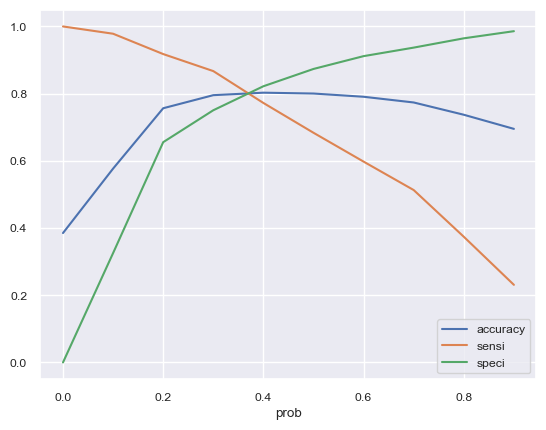

In [320]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

###### From the curve, 0.37 is the optimum point to take it as a cutoff probability.

In [321]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
3009,0,0.191932,3009,1,1,0,0,0,0,0,0,0,0,0
1012,0,0.035387,1012,1,0,0,0,0,0,0,0,0,0,0
9226,0,0.281888,9226,1,1,1,0,0,0,0,0,0,0,0
4750,1,0.881493,4750,1,1,1,1,1,1,1,1,1,0,1
7987,1,0.652916,7987,1,1,1,1,1,1,1,0,0,0,1


In [322]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8009762242166588

In [323]:
metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.7075140449438202

In [324]:
metrics.recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8237939493049877

In [325]:
metrics.f1_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.7612391386475255

In [326]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3072,  833],
       [ 431, 2015]], dtype=int64)

In [327]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [328]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8237939493049877

In [329]:
# Let us calculate specificity
TN / float(TN+FP)

0.7866837387964148

In [330]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21331626120358516


In [331]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7075140449438202


In [332]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8769626034827291


## Precision and Recall

In [333]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3072,  833],
       [ 431, 2015]], dtype=int64)

##### Precision
TP / TP + FP

In [334]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7075140449438202

##### Recall
TP / TP + FN

In [335]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8237939493049877

### Precision and recall tradeoff

In [336]:
from sklearn.metrics import precision_recall_curve

In [337]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(3009    0
 1012    0
 9226    0
 4750    1
 7987    1
        ..
 367     0
 82      1
 8199    0
 7077    0
 5754    0
 Name: Churn, Length: 6351, dtype: int64,
 3009    0
 1012    0
 9226    0
 4750    1
 7987    1
        ..
 367     0
 82      0
 8199    1
 7077    0
 5754    1
 Name: predicted, Length: 6351, dtype: int64)

In [338]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

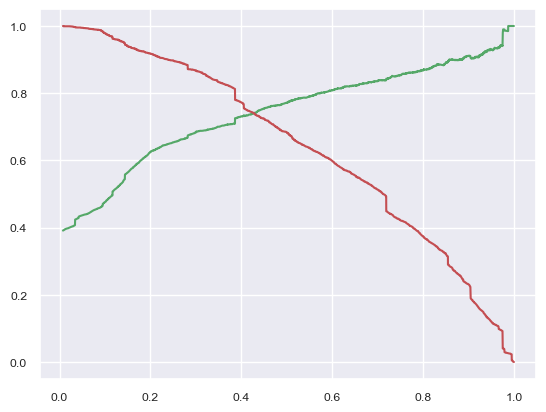

In [339]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [340]:
# Apply scaler() to all the columns in num_vars
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Null,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities
3271,0,0,0,0.054054,0.069102,0.072727,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1490,0,0,1,0.067568,0.665933,0.090909,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,0,0,0,0.027027,0.032570,0.036364,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4216,0,0,1,0.000000,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3830,0,0,0,0.108108,0.072183,0.145455,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [341]:
y_test = df_test.pop('Converted')
X_test = df_test

In [342]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Olark Chat Conversation,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,City_Null
3271,0,0.054054,0.069102,0.072727,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1490,0,0.067568,0.665933,0.090909,1,0,0,0,0,0,0,0,0,1,0,0,0,0
7936,0,0.027027,0.032570,0.036364,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4216,0,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3830,0,0.108108,0.072183,0.145455,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [343]:
X_test_sm = sm.add_constant(X_test)

In [344]:
y_test_pred = res.predict(X_test_sm)

In [345]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [346]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [347]:
y_test_df['CustID'] = y_test_df.index

In [348]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [349]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [356]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [357]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,CustID,Churn_Prob,final_predicted
0,0,3271,0.086841,0
1,1,1490,0.792639,1
2,0,7936,0.062615,0
3,1,4216,0.854322,1
4,0,3830,0.304535,0


In [354]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.43 else 0)

In [358]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7840616966580977

In [359]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1360,  374],
       [ 214,  775]], dtype=int64)

In [360]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [361]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7836198179979778

In [362]:
# Let us calculate specificity
TN / float(TN+FP)

0.7843137254901961